https://coinglass.readme.io/reference/getting-started-with-your-api

In [1]:
import requests
from requests import Session, Request, Response
import matplotlib.pyplot as plt


import time

import datetime

import pandas as pd


import plotly.graph_objects as go

In [58]:
interval = 0
symbol = 'BTC'
url = 'https://open-api.coinglass.com/api/pro/v1/futures/openInterest/chart?symbol=BTC&interval=0'
params = {}
headers = {
  'coinglassSecret': '85a2c105dc994ba0a23aa04ac411ded9'
}
response = requests.request("GET", url, headers=headers, data = params)
response = (response.json())
#FORMAT IS weird
#print(response['data'])


In [4]:
url = "https://open-api.coinglass.com/public/v2/perpetual_market?symbol=BTC"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

response  = pd.DataFrame(response.json()['data']['BTC'])
response

,exchangeName,originalSymbol,symbol,price,type,updateTime,quoteCurrency,turnoverNumber,longRate,longVolUsd,...,openPrice,priceChange,priceChangePercent,indexPrice,buyTurnoverNumber,sellTurnoverNumber,fundingRate,nextFundingTime,predictedRate,expiryDate
0,Binance,BTCUSDT,BTC,16701.30,1,1671460144551,USDT,1278355,50.59,1.873482e+09,...,16693.70,7.60,0.05,16711.158942,651727,626628,0.005303,1.671466e+12,NaN,NaN
1,Bitget,BTCUSDT_UMCBL,BTC,16701.00,1,1671460144551,USDT,169317,49.34,1.050072e+09,...,16688.50,12.50,0.07,16710.441818,83385,85932,0.006103,1.671462e+12,NaN,NaN
2,Bybit,BTCUSDT,BTC,16705.50,1,1671460144551,USDT,362877,51.85,5.650099e+08,...,16692.00,13.50,0.08,16712.380000,195396,167481,0.001800,NaN,NaN,NaN
3,OKX,BTC-USD-SWAP,BTC,16711.70,1,1671460144551,USD,30094,51.10,3.868840e+07,...,16729.80,-18.10,-0.11,16712.600000,15037,15057,0.002641,1.671466e+12,0.009943,NaN
4,OKX,BTC-USDT-SWAP,BTC,16711.10,1,1671460144551,USDT,144609,50.13,3.296799e+08,...,16733.80,-22.70,-0.14,16710.300000,72674,71935,-0.023315,1.671466e+12,0.006418,NaN
5,Bybit,BTCUSD,BTC,16702.00,1,1671460144551,USD,119063,55.73,1.273053e+08,...,16682.00,20.00,0.12,16699.470000,66904,52159,-0.002200,NaN,NaN,NaN
6,Deribit,BTC-PERPETUAL,BTC,16701.00,1,1671460144551,USD,21396,52.37,4.054849e+07,...,16691.00,10.00,0.06,16709.270000,10798,10598,-0.011432,NaN,NaN,NaN
7,Binance,BTCUSD_PERP,BTC,16704.30,1,1671460144551,USD,135225,49.91,2.359275e+08,...,16692.70,11.60,0.07,16711.026238,67879,67346,0.000134,1.671466e+12,NaN,NaN
8,Binance,BTCBUSD,BTC,16704.90,1,1671460144551,BUSD,244006,50.19,3.321552e+08,...,16696.00,8.90,0.05,16712.897614,122821,121185,0.005126,1.671466e+12,NaN,NaN
9,Bitget,BTCUSD_DMCBL,BTC,16696.00,1,1671460144551,USD,46375,44.38,1.288284e+07,...,16691.00,5.00,0.03,16712.384166,22737,23638,0.010000,1.671462e+12,NaN,NaN


Exchange OI split

In [8]:
url = "https://open-api.coinglass.com/public/v2/open_interest_history?symbol=BTC&time_type=all&currency=USD"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

response = (response.json()['data'])
####

#the data is formated like exchange:[100,101,] exchange:

Aggregrated OI

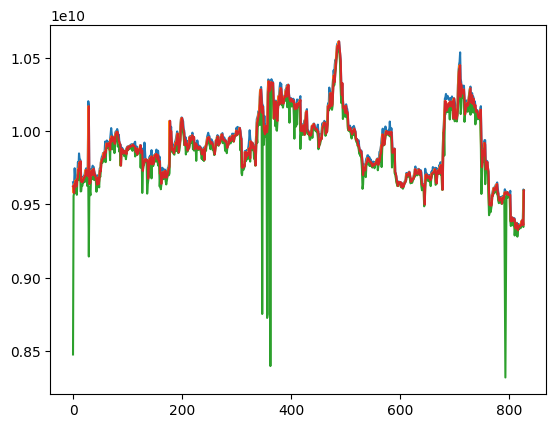

In [68]:
url = "https://open-api.coinglass.com/public/v2/indicator/open_interest_aggregated_ohlc?symbol=BTC&interval=h1&start_time=1668481704000&limit=500"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

df = pd.DataFrame(response.json()['data'])

plt.plot(df['h'])
plt.plot(df['c'])
plt.plot(df['l'])
plt.plot(df['o'])

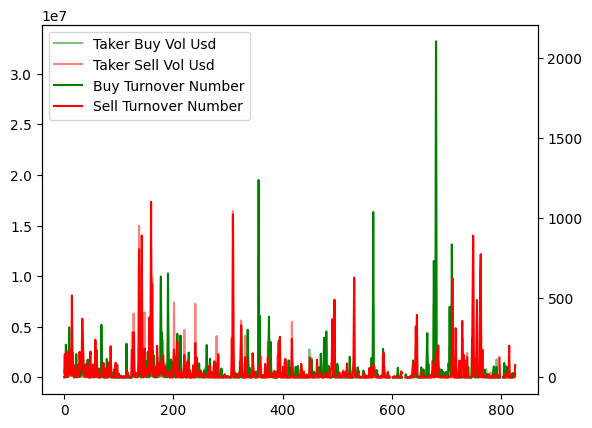

In [48]:
url = "https://open-api.coinglass.com/public/v2/indicator/liquidation_symbol?symbol=BTC&interval=h1&start_time=1668481704000&limit=500"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

response = pd.DataFrame(response.json()['data'])

ax1 = plt.subplot()
v1, = ax1.plot(response['buyVolUsd'], color='green', alpha = 0.5)
v2, = ax1.plot(response['sellVolUsd'], color='red', alpha = 0.5)
ax2 = ax1.twinx()
t1, = ax2.plot(response['buyTurnoverNumber'], color='green', alpha = 1)
t2, = ax2.plot(response['sellTurnoverNumber'], color='red', alpha = 1)

plt.legend([v1, v2, t1, t2], ["Taker Buy Vol Usd", "Taker Sell Vol Usd","Buy Turnover Number", "Sell Turnover Number"])

plt.show()


seems like an exchange split of liq data

In [19]:
url = "https://open-api.coinglass.com/public/v2/liquidation_history?time_type=all&symbol=all"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

data = pd.DataFrame(response.json()['data'])
data = data['list']
data[0]

[{'exchangeName': 'Binance',
  'buyVolUsd': 30343380.92213255,
  'sellVolUsd': 48972793.06575519,
  'turnoverNumber': 38953,
  'buyTurnoverNumber': 12395,
  'sellTurnoverNumber': 26558,
  'sellQty': 0,
  'buyQty': 0},
 {'exchangeName': 'OKX',
  'buyVolUsd': 39076856.79631,
  'sellVolUsd': 97823031.79976,
  'turnoverNumber': 13386,
  'buyTurnoverNumber': 3876,
  'sellTurnoverNumber': 9510,
  'sellQty': 0,
  'buyQty': 0},
 {'exchangeName': 'Bybit',
  'buyVolUsd': 13588051.20191,
  'sellVolUsd': 15312014.49888,
  'turnoverNumber': 7034,
  'buyTurnoverNumber': 2508,
  'sellTurnoverNumber': 4526,
  'sellQty': 0,
  'buyQty': 0},
 {'exchangeName': 'Huobi',
  'buyVolUsd': 4219854.19477,
  'sellVolUsd': 9861420.34795,
  'turnoverNumber': 2594,
  'buyTurnoverNumber': 841,
  'sellTurnoverNumber': 1753,
  'sellQty': 0,
  'buyQty': 0},
 {'exchangeName': 'Bitmex',
  'buyVolUsd': 1331494.57829063,
  'sellVolUsd': 5491675.2221536,
  'turnoverNumber': 246,
  'buyTurnoverNumber': 57,
  'sellTurnoverNumb

This should be the standard long short ratio

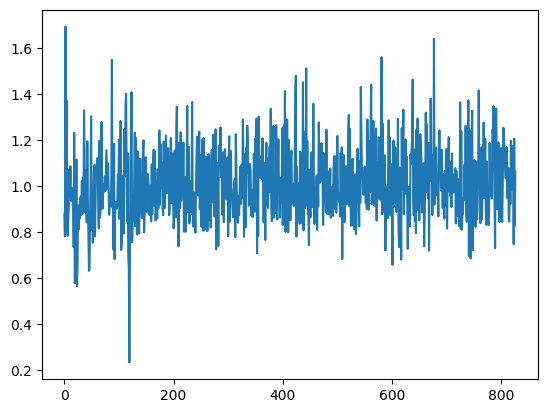

In [55]:
url = "https://open-api.coinglass.com/public/v2/indicator/long_short_symbol?symbol=BTC&interval=h1&start_time=1668481704000&limit=500"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

response = pd.DataFrame(response.json()['data'])
response.set_index('t')
plt.plot(response['v'])

I think this is the top accounts long short ratio or maybe its binance specific, not sure

In [49]:
exchange = 'Binance' # 'Okex' ## OKEX is bugged

url = f"https://open-api.coinglass.com/public/v2/indicator/long_short_accounts?ex={exchange}&pair=BTCUSDT&interval=h1&start_time=1668481704000&end_time=1668568104000"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)
#print(response.json()['data'])

Funding

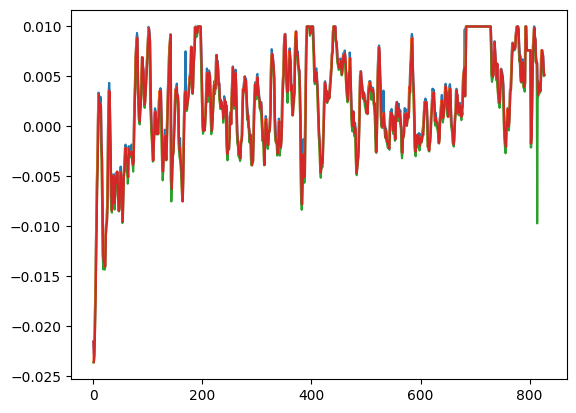

In [57]:
url = "https://open-api.coinglass.com/public/v2/indicator/funding_ohlc?ex=Binance&pair=BTCUSDT&interval=h1&start_time=1668481704000&limit=500"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

df = pd.DataFrame(response.json()['data'])

plt.plot(df['h'])
plt.plot(df['c'])
plt.plot(df['l'])
plt.plot(df['o'])